# k-NN Classification Using 2-D Features

Text(0.5,1,'Training Data')

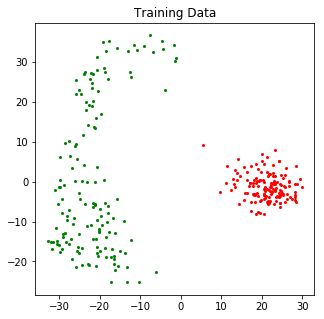

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

images, labels = load_digits(2, return_X_y=True)


trainImgs = images[:300]
trainLabels = labels[:300]

testImgs = images[300:]
testLabels = labels[300:]

m = np.mean(trainImgs.T,1)
m = m.reshape(64,1)

Xcent = trainImgs.T - m
covX = np.cov(Xcent)
vals, vects = np.linalg.eig(covX)
inds = vals.argsort()[-2:][::-1]


u1 = np.reshape(vects[:,inds[0]],(64,1))
u2 = np.reshape(vects[:,inds[1]],(64,1))
U = np.concatenate((u1,u2),1)


trainClasses = np.matmul(trainImgs, U)

fig, axes = plt.subplots(1, 1,figsize=(5,5))

for i in range(0,len(trainLabels)):    
    if(trainLabels[i]==0):
        axes.plot(trainClasses[i,0],trainClasses[i,1],'ro',markersize = 2)
    elif(trainLabels[i] ==1):
        axes.plot(trainClasses[i,0],trainClasses[i,1],'go',markersize = 2)

axes.set_title('Training Data')

Text(0.5,1,'Test Data')

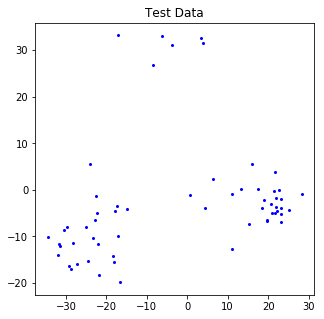

In [3]:
def dist(pt1, pt2):
    distance = 0
    for i in range(0,len(pt1)):
        distance += np.square(pt1[i]-pt2[i])
    return np.sqrt(distance)

k = 5
testPts = np.matmul(testImgs,U)
testLabelPredict = []
for testPt in testPts:
    distandlabel = []
    for i in range(0,len(trainClasses)):
        distandlabel.append((dist(trainClasses[i], testPt),trainLabels[i]))
    
    distandlabel.sort(key=lambda tup: tup[0]) 
    
    lowestK = np.array(distandlabel[:k])
    
    prediction = 0
    if (sum(lowestK[:,1]) > 2 ):
        prediction = 1
        
    testLabelPredict.append(prediction)

    
fig, axes = plt.subplots(1, 1,figsize=(5,5))
for i in range(0,len(testPts)):    
    if(testLabelPredict[i]- testLabels[i] ==0):
        axes.plot(testPts[i,0],testPts[i,1],'bo', markersize = 2)
    else:
        axes.plot(testPts[i,0],testPts[i,1],'ko', markersize = 2)

axes.set_title('Test Data')

Text(0.5,1,'Average Classification Error')

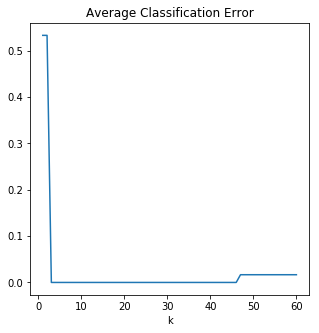

In [4]:
def kNN(k,testPts, trainLabels, trainClasses):
    testLabelPredict = []
    for testPt in testPts:
        distandlabel = []
        for i in range(0,len(trainClasses)):
            distandlabel.append((dist(trainClasses[i], testPt),trainLabels[i]))
            
        distandlabel.sort(key=lambda tup: tup[0]) 
    
        lowestK = np.array(distandlabel[:k])
    
        prediction = 0
        if (sum(lowestK[:,1]) > 2 ):
            prediction = 1
        
        testLabelPredict.append(prediction)
    
    return testLabelPredict


testPts = np.matmul(testImgs,U)
nums = []
kVals = np.array(range(1,len(testPts)+1))
for k in kVals:
    predictedVals = kNN(k, testPts,trainLabels, trainClasses)
    error = predictedVals-testLabels
    nums.append((float)(sum([abs(num) for num in error]))/len(testPts))

fig, axes = plt.subplots(1, 1,figsize=(5,5))
axes.plot(kVals, nums)
axes.set_xlabel('k')
axes.set_title('Average Classification Error')

# k-NN Classification Using Higher-dimensional Features


In [5]:
variation = 0
covX = np.cov(Xcent)
vals, vects = np.linalg.eig(covX)
sumEig = sum(vals)
f = 1
while variation < .95:
    inds = vals.argsort()[-f:][::-1]
    U = np.reshape(vects[:,inds[0]],(64,1))
    for i in range (1,f):
        uTemp = np.reshape(vects[:,inds[i]],(64,1))
        U = np.concatenate((U,uTemp),1)
        
    tempSum = 0
    for i in inds:
        tempSum+= vals[i]
    variation = tempSum/sumEig
    f += 1

print('Need top',f,'principal components to capture 95% of variation')

Need top 20 principal components to capture 95% of variation


Text(0.5,1,'Average Classification Error for 20 Principal Components')

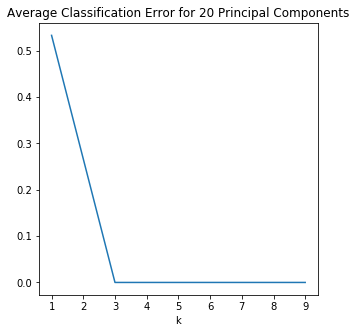

In [7]:
trainClasses = np.matmul(trainImgs, U)
testPts = np.matmul(testImgs,U)
kVals = [1,3,5,7,9]
classErrors = []
for k in kVals:
    predictions = kNN(k, testPts,trainLabels, trainClasses)
    error = predictions - testLabels
    tempSum = sum([abs(num) for num in error])/len(error)
    classErrors.append(tempSum)


fig, axes = plt.subplots(1, 1,figsize=(5,5))
axes.plot(kVals, classErrors)
axes.set_xlabel('k')
title = 'Average Classification Error for '+ str(f) + ' Principal Components'
axes.set_title(title)

For future k-NN classification of digits '0' and '1', I would recommend a $k\geq 3$. In this case, to optimize based on time, it would be best to use $k=3$. This stems from the previous plot for 20 principal components showing that the average classification error is $0$ when $k=3$. Likewise, for the plot of $k = 1:60$, the error is $0$ starting at $k = 3$. 